In [2]:
import torch
import xarray as xr  # or from netCDF4 import Dataset
from netCDF4 import Dataset

In [3]:
# Load the .nc file
file_path = 'potential_vorticity_2018_5.625deg.nc'
data = xr.open_dataset(file_path)

# Inspect the data
print(data)

<xarray.Dataset> Size: 933MB
Dimensions:  (lat: 32, lon: 64, level: 13, time: 8760)
Coordinates:
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * level    (level) int32 52B 50 100 150 200 250 300 ... 600 700 850 925 1000
  * time     (time) datetime64[ns] 70kB 2018-01-01 ... 2018-12-31T23:00:00
Data variables:
    pv       (time, level, lat, lon) float32 933MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-08 17:40:32 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [4]:
# Select a variable (e.g., 'temperature') and convert it to a PyTorch tensor
numpy_array_lat = data['lat'].values 
numpy_array_lon = data['lon'].values 
numpy_array_time = data['time'].values 
numpy_array_level = data['level'].values 
numpy_array_pv = data['pv'].values 

#print(numpy_array_lat )
#print(numpy_array_lon )
print(numpy_array_time)
print(numpy_array_time.size)
#print(numpy_array_level)
#print(numpy_array_pv)
#print(numpy_array) 
tensor = torch.from_numpy(numpy_array_pv)


['2018-01-01T00:00:00.000000000' '2018-01-01T01:00:00.000000000'
 '2018-01-01T02:00:00.000000000' ... '2018-12-31T21:00:00.000000000'
 '2018-12-31T22:00:00.000000000' '2018-12-31T23:00:00.000000000']
8760


In [5]:

slices = [tensor[i:i+24] for i in range(0, tensor.size(dim=0), 24)] 

In [6]:
print(len(slices))

365


In [7]:
import os
import glob
import numpy as np

files = glob.glob('daily2018/*.npy')
for f in files:
    os.remove(f)

for i, slice_tensor in enumerate(slices):
    filename = f"daily2018/tensor_slice_{i+1}.npy"
    np.save(filename, slice_tensor.numpy())  
    print(f"Saved slice {i} to {filename}")

Saved slice 0 to daily2018/tensor_slice_1.npy
Saved slice 1 to daily2018/tensor_slice_2.npy
Saved slice 2 to daily2018/tensor_slice_3.npy
Saved slice 3 to daily2018/tensor_slice_4.npy
Saved slice 4 to daily2018/tensor_slice_5.npy
Saved slice 5 to daily2018/tensor_slice_6.npy
Saved slice 6 to daily2018/tensor_slice_7.npy
Saved slice 7 to daily2018/tensor_slice_8.npy
Saved slice 8 to daily2018/tensor_slice_9.npy
Saved slice 9 to daily2018/tensor_slice_10.npy
Saved slice 10 to daily2018/tensor_slice_11.npy
Saved slice 11 to daily2018/tensor_slice_12.npy
Saved slice 12 to daily2018/tensor_slice_13.npy
Saved slice 13 to daily2018/tensor_slice_14.npy
Saved slice 14 to daily2018/tensor_slice_15.npy
Saved slice 15 to daily2018/tensor_slice_16.npy
Saved slice 16 to daily2018/tensor_slice_17.npy
Saved slice 17 to daily2018/tensor_slice_18.npy
Saved slice 18 to daily2018/tensor_slice_19.npy
Saved slice 19 to daily2018/tensor_slice_20.npy
Saved slice 20 to daily2018/tensor_slice_21.npy
Saved slice

In [8]:
data = np.load("daily2018/tensor_slice_1.npy")

print(data.shape)


(24, 13, 32, 64)


In [9]:
import matplotlib.pyplot as plt

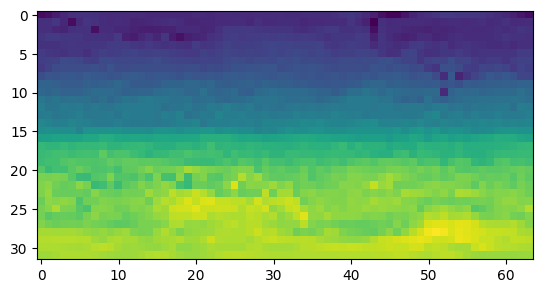

In [10]:
# Plotting one level of vorticity
plt.imshow(data[0, 0, :, :])
plt.show()


In [11]:
#Data normalization
mean = data.mean(axis=(0,2,3))
std = data.std(axis=(0,2,3))

mean = np.expand_dims(mean, axis=(0,2,3))
std = np.expand_dims(std, axis=(0,2,3))


(1, 13, 1, 1)
(1, 13, 1, 1)


In [15]:
data_norm = (data - mean )/ std  # z-score
data_norm

array([[[[-1.76263344e+00, -1.70472109e+00, -1.58418572e+00, ...,
          -1.54234242e+00, -1.64708340e+00, -1.73353708e+00],
         [-1.38357031e+00, -1.37969100e+00, -1.31734502e+00, ...,
          -1.42956710e+00, -1.44619286e+00, -1.42264104e+00],
         [-1.37802839e+00, -1.40019584e+00, -1.45589161e+00, ...,
          -1.37775183e+00, -1.34450102e+00, -1.35419762e+00],
         ...,
         [ 1.24825931e+00,  1.24853635e+00,  1.27208924e+00, ...,
           1.31670058e+00,  1.32695341e+00,  1.29536641e+00],
         [ 1.22193527e+00,  1.22886264e+00,  1.23052537e+00, ...,
           1.25684988e+00,  1.23052573e+00,  1.21417701e+00],
         [ 1.14130139e+00,  1.15709567e+00,  1.18591321e+00, ...,
           1.10638750e+00,  1.10971260e+00,  1.12412119e+00]],

        [[-1.47911048e+00, -1.46767712e+00, -1.46196055e+00, ...,
          -1.54485285e+00, -1.51984227e+00, -1.49483192e+00],
         [-1.33619356e+00, -1.31761420e+00, -1.33762276e+00, ...,
          -1.32833219e